In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from google.colab import files


In [2]:
uploaded = files.upload()

Saving 5challenge_training_riladdha.csv to 5challenge_training_riladdha.csv


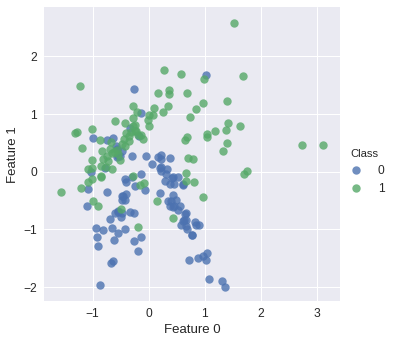

In [3]:
training_df = pd.read_csv('5challenge_training_riladdha.csv')
training_df=training_df.drop(training_df.columns[0],axis=1)

# Assigning the variable
training_df.head()
x=training_df.drop('Class',axis=1)
y=training_df['Class']

# raw data plot
sns.lmplot('Feature 0','Feature 1',data= training_df, hue='Class',palette=None,fit_reg=False,scatter_kws={"s":70})

In [4]:
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="sigmoid")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.2782559402207124, 'gamma': 0.10110909090909091}
CV Score with best parameter values: 0.78


In [5]:

from sklearn.model_selection import GridSearchCV

params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="linear")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.2782559402207124, 'gamma': 0.0001}
CV Score with best parameter values: 0.775


In [6]:

from sklearn.model_selection import GridSearchCV

params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="rbf")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 3.4304692863149193, 'gamma': 0.7071636363636363}
CV Score with best parameter values: 0.855


In [9]:
uploaded = files.upload()

Saving 5challenge_testing_riladdha.csv to 5challenge_testing_riladdha.csv


In [10]:
testing_df = pd.read_csv('5challenge_testing_riladdha.csv')
testing_df=testing_df.drop(testing_df.columns[0],axis=1)
x_test=testing_df.drop('Class',axis=1)
x_test.head()

,Feature 0,Feature 1
0,-1.237855,-0.255415
1,-0.420818,-0.248818
2,0.848362,1.305292
3,-2.214239,-1.097154
4,0.222343,-0.221634


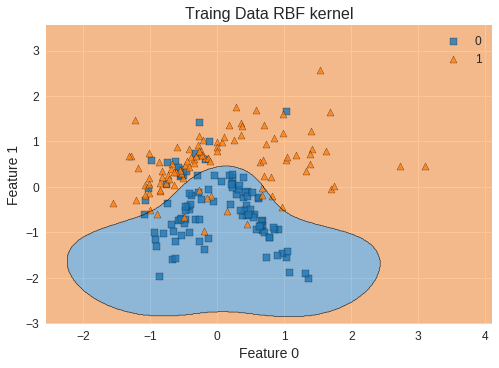

In [17]:

#non linear model
clf1=svm.SVC(kernel='rbf',C=3.4304692863149193,gamma=0.7071636363636363 )
clf1.fit(x,y)


y_test = clf1.predict(x_test)

testing_df['Class'] = y_test
testing_df.to_csv('5challenge_testing_riladdha.csv')
files.download("5challenge_testing_riladdha.csv")

#PLotting the decision boundary for the RBF kernel
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x.values, 
                      y=y.values,
                      clf=clf1, 
                      )

plt.xlabel(x.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('Traing Data RBF kernel', size=16)
plt.show()

In [16]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 8.1MB/s 


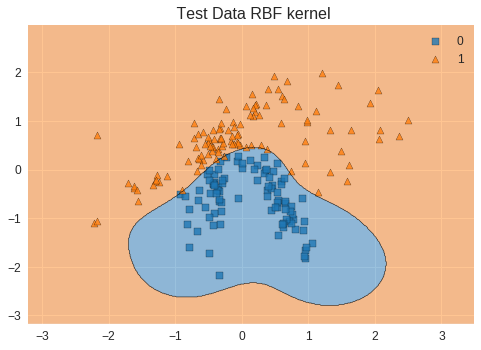

In [86]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x_test.values, 
                      y=y_test,
                      clf=clf1, 
                      )

plt.title(' Test Data RBF kernel', size=16)
plt.show()

